#Tawanda G Mavondo 
#Reg: R204447C

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import pickle


# Load Data (CSV) data 

In [ ]:
main_data = pd.read_csv('players_20.csv')

# Feature Extraction

In [ ]:
fifa_data_frame = main_data[['short_name','age','overall','potential', 'value_eur', 'wage_eur']]

In [ ]:
fifa_data_frame

,short_name,age,overall,potential,value_eur,wage_eur
0,L. Messi,32,94,94,95500000,565000
1,Cristiano Ronaldo,34,93,93,58500000,405000
2,Neymar Jr,27,92,92,105500000,290000
3,J. Oblak,26,91,93,77500000,125000
4,E. Hazard,28,91,91,90000000,470000
...,...,...,...,...,...,...
2014,M. Braithwaite,28,75,75,7000000,30000
2015,P. Bargfrede,30,75,75,5500000,23000
2016,M. Destro,28,75,75,7000000,33000
2017,H. Behrens,29,75,75,6500000,15000


In [ ]:
fifa_data_frame.loc[:,'value_eur'] =fifa_data_frame.loc[:,'value_eur']/1000000
fifa_data_frame.loc[:,'wage_eur'] = fifa_data_frame.loc[:,'wage_eur']/10000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


#DATA EXPLORATION

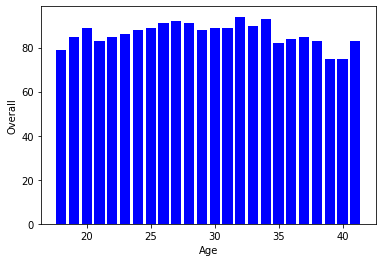

In [ ]:
plt.bar('age', 'overall', data = fifa_data_frame, color = 'blue')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.show()

In [ ]:
fifa_data_frame.corr()

,age,overall,potential,value_eur,wage_eur
age,1.000000,0.084327,-0.546049,-0.248677,-0.001848
overall,0.084327,1.000000,0.688901,0.841745,0.723144
potential,-0.546049,0.688901,1.000000,0.763793,0.520893
value_eur,-0.248677,0.841745,0.763793,1.000000,0.781695
wage_eur,-0.001848,0.723144,0.520893,0.781695,1.000000


#Data Splitting Training:75%, Test:25%

In [ ]:
linear_regression = linear_model.LinearRegression()

In [ ]:
split = np.random.rand(len(fifa_data_frame)) < 0.75
train = fifa_data_frame[split]
test = fifa_data_frame[~split]

#Model Training 


In [ ]:
# Training and fitting the model
# Am now splitting the x_training features and the y output train label
x_train = train[['age','value_eur','potential','wage_eur']]
y_train = train[['overall']]

# Fitting Data
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
linear_regression.fit(x_train_poly,y_train)

LinearRegression()

# Testing the model

In [ ]:
x_test = test[['age','value_eur','potential', 'wage_eur']]
y_test = test[['overall']]

x_test_poly = poly.fit_transform(x_test)

pickle.dump(linear_regression, open('model.sav', 'wb'))

prediction = linear_regression.predict(x_test_poly)


In [ ]:
print("Coefficient Of Determination Score: ",r2_score(y_test, prediction))


Coefficient Of Determination Score:  0.9683130133175946


In [ ]:
x_train["Predicted Rating %"] = pd.Series(np.array([x[0] for x in prediction]))
df_fifa_2 = pd.merge(fifa_data_frame, x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_fifa_2.head(10)

,short_name,age,overall,potential,value_eur,wage_eur,Predicted Rating %
0,L. Messi,32,94,94,95.5,56.5,93.975444
1,Cristiano Ronaldo,34,93,93,58.5,40.5,88.272427
2,Neymar Jr,27,92,92,105.5,29.0,88.594757
3,J. Oblak,26,91,93,77.5,12.5,88.819939
4,E. Hazard,28,91,91,90.0,47.0,85.968161
5,M. ter Stegen,27,90,93,67.5,25.0,86.005684
6,L. Modrić,33,90,90,45.0,34.0,87.338126
7,M. Salah,27,90,90,80.5,24.0,87.167787
8,K. Mbappé,20,89,95,93.5,15.5,87.127848
9,K. Koulibaly,28,89,91,67.5,15.0,84.409069


#FIFA 20 players’ overall ratings correlated with their potential



In [ ]:
df_Potential = fifa_data_frame.loc[:, "potential"].values.reshape(-1, 1) 
df_Overall = fifa_data_frame.loc[:, "overall"].values.reshape(-1, 1) 

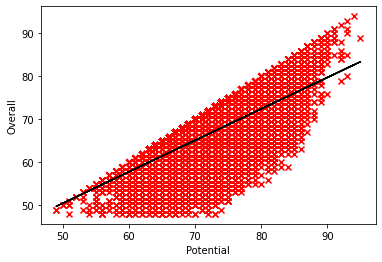

In [ ]:
linear_r = linear_regression.fit(df_Potential, df_Overall) 
pred = linear_r.predict(df_Potential)
plt.scatter('potential', 'overall', data = fifa_data_frame, marker = 'x', color = 'red')
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.plot(df_Potential,pred, color='black')
plt.show()

#USING FIFA 19 Ratings To Predict FIFA 20 Ratings


In [ ]:
fifa_2019_data = pd.read_csv("players_19.csv")

In [ ]:
fifa_19_dataframe = fifa_2019_data[['short_name','age','overall','potential', 'value_eur', 'wage_eur']]


In [ ]:
fifa_19_dataframe['value_eur'] = fifa_19_dataframe['value_eur']/1000000
fifa_19_dataframe['wage_eur'] = fifa_19_dataframe['wage_eur']/10000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fifa_19_dataframe.dropna()

,short_name,age,overall,potential,value_eur,wage_eur
0,Cristiano Ronaldo,33.0,94.0,94.0,77.0,40.5
1,L. Messi,31.0,94.0,94.0,110.5,56.5
2,Neymar Jr,26.0,92.0,93.0,118.5,29.0
3,De Gea,27.0,91.0,93.0,72.0,26.0
4,K. De Bruyne,27.0,91.0,92.0,102.0,35.5
...,...,...,...,...,...,...
1963,V. Cáceres,33.0,75.0,75.0,0.0,0.0
1964,C. Beauvue,30.0,75.0,75.0,6.5,2.3
1965,Oier,28.0,75.0,75.0,4.7,1.7
1966,R. Bobadilla,31.0,75.0,75.0,6.0,1.5


In [ ]:
fifa_19_dataframe.head()


,short_name,age,overall,potential,value_eur,wage_eur
0,Cristiano Ronaldo,33.0,94.0,94.0,77.0,40.5
1,L. Messi,31.0,94.0,94.0,110.5,56.5
2,Neymar Jr,26.0,92.0,93.0,118.5,29.0
3,De Gea,27.0,91.0,93.0,72.0,26.0
4,K. De Bruyne,27.0,91.0,92.0,102.0,35.5


In [ ]:
split = np.random.rand(len(fifa_19_dataframe)) < 0.75
train2 = fifa_19_dataframe[split]
test2 = fifa_19_dataframe[~split]

In [ ]:
linear_r = linear_model.LinearRegression()

In [ ]:
x_train2 = train2[['age','value_eur','potential','wage_eur']]
y_train2 = train2[['overall']]

In [ ]:
poly = PolynomialFeatures(degree=4)
x_train2_poly = poly.fit_transform(x_train2)
linear_r.fit(x_train2_poly,y_train2)

LinearRegression()

In [ ]:
df_fifa = fifa_data_frame[['age','value_eur','potential','wage_eur']]
df_fifa_poly = poly.fit_transform(df_fifa)


#Testing Model



In [ ]:
fifa_x_test2 = test2[['age','value_eur','potential','wage_eur']]
fifa_y_test2 = test2[['overall']]
fifa_x_test_poly2 = poly.fit_transform(fifa_x_test2)

In [ ]:
pred2 = linear_r.predict(fifa_x_test_poly2)


In [ ]:
print("Coefficient Of Determination Score: ",r2_score(fifa_y_test2, pred2))


Coefficient Of Determination Score:  0.9481206800552904


In [ ]:
x_train2["Fifa 2020 Predicted Rating %"] = pd.Series(np.array([x[0] for x in pred2]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x_train2.head(10)

,age,value_eur,potential,wage_eur,Fifa 2020 Predicted Rating %
0,33,0.000077,94,0.00405,119.752801
1,31,0.000111,94,0.00565,50.071889
2,26,0.000118,93,0.00290,91.860446
3,27,0.000072,93,0.00260,91.464159
4,27,0.000102,92,0.00355,108.454193
5,32,0.000051,91,0.00380,64.318459
6,31,0.000080,91,0.00455,89.598820
7,32,0.000067,91,0.00420,443.401062
9,25,0.000068,93,0.00094,64.607213
10,26,0.000062,91,0.00250,76.138066


In [ ]:
fifa_data_df = fifa_data_frame[['age','value_eur','potential','wage_eur']]
df_fifa_poly = poly.fit_transform(fifa_data_df)

In [ ]:
df_20 =pd.merge(train2,x_train2)

In [ ]:
df_20.head(10)

,short_name,age,overall,potential,value_eur,wage_eur,Fifa 2020 Predicted Rating %
0,Cristiano Ronaldo,33,94,94,0.000077,0.00405,119.752801
1,L. Messi,31,94,94,0.000111,0.00565,50.071889
2,Neymar Jr,26,92,93,0.000118,0.00290,91.860446
3,De Gea,27,91,93,0.000072,0.00260,91.464159
4,K. De Bruyne,27,91,92,0.000102,0.00355,108.454193
5,Sergio Ramos,32,91,91,0.000051,0.00380,64.318459
6,L. Suárez,31,91,91,0.000080,0.00455,89.598820
7,L. Modrić,32,91,91,0.000067,0.00420,443.401062
8,J. Oblak,25,90,93,0.000068,0.00094,64.607213
9,T. Courtois,26,90,91,0.000062,0.00250,76.138066


#Web Application Presentation
[Video Link](https://drive.google.com/file/d/19k2Te43fhzYLmf9AoXGWBsTt6j2jyfv0/view?usp=sharing)